In [1]:
import pandas as pd
import scipy as scp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def linear_regression(x, y) :
    
    if (x.ndim == 1) : x = scp.matrix(x).T
    else : x = scp.matrix(x)
    y = scp.matrix(y).T
    
    
    ones_column = scp.tile([1], (x.shape[0], 1))
    x = scp.concatenate((x, ones_column), axis=1)
    
    w = (((((x.T * x).I) * x.T))* y ).A
    
    b = w[-1,0]
    w = w[0:-1].flatten()
    
    predict = lambda new : scp.dot(w, new) + b
    
    return {'hyp' : predict, 'est_params' : {'weigths': w, 'bias': b}}

In [41]:
def make_plot(x, y, models, name, figsize = (12,8)) : 
    
    fig, ax = plt.subplots(1,1, figsize = figsize)
    
    ax.scatter(x,y)
    
    xs = scp.arange(x.min() - 0.1, x.max() + 0.2, 0.1)
    
    for model in models :   
        ys = scp.vectorize(model)(xs)
        ax.plot(xs, ys)
    
    ax.set_xlabel('Temperatur', fontsize = 'x-large')
    ax.set_ylabel('Energy', fontsize = 'x-large')
    
    fig.savefig(name)
    
    return

In [21]:
def mse(x, y, model) :
    
    pred = scp.vectorize(model)(x)
    errors = y - pred
    
    return scp.sum(errors ** 2) / errors.shape[0]

In [22]:
def var(y) :
    return scp.sum((y - scp.mean(y)) ** 2) / y.shape[0]

In [23]:
danwood = pd.read_table('DanWood.dt', header = None, sep = ' ')

In [24]:
danwood.columns = ['temp','energy']

In [44]:
danwood.head()

,temp,energy
0,1.309,2.138
1,1.471,3.421
2,1.490,3.597
3,1.565,4.340
4,1.611,4.882


In [25]:
x = danwood.temp.values

In [26]:
y = danwood.energy.values

In [27]:
reg = linear_regression(x,y)

In [28]:
model = reg['hyp']

In [29]:
reg['est_params']['weigths']

array([ 9.48934569])

In [30]:
reg['est_params']['bias']

-10.426961463732555

In [31]:
var(y)

1.2689295555555555

In [32]:
mse(x,y,model)

0.012434221615053928

In [33]:
mse(x, y, model) / var(y)

0.0097989849480730612

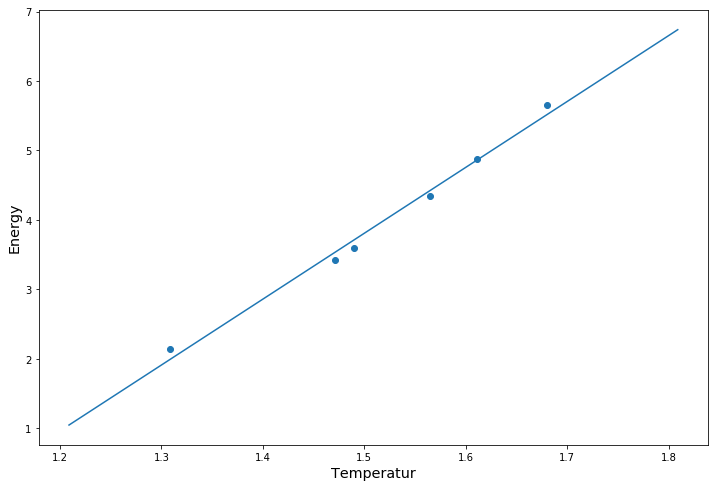

In [42]:
make_plot(x, y, [model], 'reg_plot_1.jpg')

In [18]:
constant_model = lambda x : scp.mean(y)

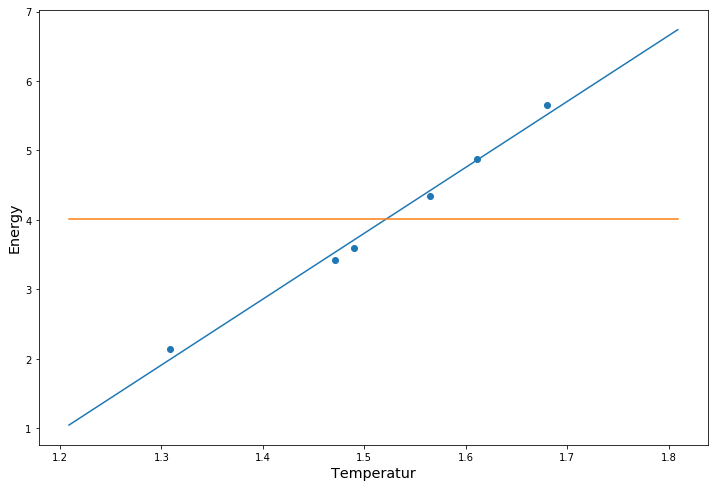

In [43]:
make_plot(x, y, [model, constant_model], 'reg_plot_2.jpg')